## Load Libraries

In [1]:
import pandas as pd
import numpy as np
import folium
import requests
import matplotlib
import seaborn as sb
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cmx
import matplotlib.colors as colors
import math
import pylab
import scipy.stats as stats
%matplotlib inline
from folium.plugins import MarkerCluster
from folium import plugins
from folium.plugins import FastMarkerCluster
from folium.plugins import HeatMap
from scipy.stats import pearsonr

#  Load Data

In [2]:
dataset = pd.read_csv(r"C:\Users\user\Desktop\SSBs\SSBs.csv")

## Exploratory Data Analysis

We are given the World Bank SSBs Dataset, which looks like this:

In [3]:
dataset.head()

,jurisdiction,country_code,unique_id,region,income_group,population,level,year_imp,date_imp,last_update,...,Unnamed: 76,Unnamed: 77,Unnamed: 78,Unnamed: 79,Unnamed: 80,Unnamed: 81,Unnamed: 82,Unnamed: 83,Unnamed: 84,Unnamed: 85
0,"Albany, USA",USA,USA1,NAR,HIC,NaN,City/County,2017.0,2017-04-30,N/I,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,American Samoa,ASM,ASM,EAP,HIC,44273.0,National,2001.0,2001-06-01,N/I,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Argentina,ARG,ARG,LAC,UMIC,46234830.0,National,1996.0,1996-08-01,2017-12-01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Azerbaijan,AZE,AZE,ECA,UMIC,10175016.0,National,2019.0,2019-01-01,N/I,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Bahrain,BHR,BHR,MENA,HIC,10175016.0,National,2017.0,2017-12-30,N/I,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1991 entries, 0 to 1990
Data columns (total 86 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   jurisdiction       132 non-null    object 
 1   country_code       132 non-null    object 
 2   unique_id          132 non-null    object 
 3   region             132 non-null    object 
 4   income_group       132 non-null    object 
 5   population         113 non-null    float64
 6   level              132 non-null    object 
 7   year_imp           132 non-null    float64
 8   date_imp           132 non-null    object 
 9   last_update        131 non-null    object 
 10  update_detail      53 non-null     object 
 11  instrument         132 non-null    object 
 12  structure          132 non-null    object 
 13  basis_specific     77 non-null     object 
 14  basis_advalorem    63 non-null     object 
 15  products           132 non-null    object 
 16  carbonates         132 n

In [5]:
dataset.isna().sum(axis=0)

jurisdiction    1859
country_code    1859
unique_id       1859
region          1859
income_group    1859
                ... 
Unnamed: 81     1991
Unnamed: 82     1991
Unnamed: 83     1991
Unnamed: 84     1991
Unnamed: 85     1991
Length: 86, dtype: int64

In [6]:
dataset.describe()

,population,year_imp,carbonates,concentrates,energy_drinks,juice_unsweetened,juice_sweetened,milk_drinks,lcsb,water_unsweetened,...,Unnamed: 76,Unnamed: 77,Unnamed: 78,Unnamed: 79,Unnamed: 80,Unnamed: 81,Unnamed: 82,Unnamed: 83,Unnamed: 84,Unnamed: 85
count,1.130000e+02,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,3.992554e+07,2010.659091,0.977273,0.727273,0.992424,0.356061,0.636364,0.416667,0.787879,0.310606,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,1.386788e+08,11.094204,0.149600,0.447058,0.087039,0.480658,0.482878,0.494885,0.410368,0.464505,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.131200e+04,1965.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,1.262523e+06,2004.750000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,1.017502e+07,2015.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,3.054758e+07,2018.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,1.417173e+09,2023.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
dataset.isnull().sum()

jurisdiction    1859
country_code    1859
unique_id       1859
region          1859
income_group    1859
                ... 
Unnamed: 81     1991
Unnamed: 82     1991
Unnamed: 83     1991
Unnamed: 84     1991
Unnamed: 85     1991
Length: 86, dtype: int64

In [8]:
dataset.dtypes

jurisdiction     object
country_code     object
unique_id        object
region           object
income_group     object
                 ...   
Unnamed: 81     float64
Unnamed: 82     float64
Unnamed: 83     float64
Unnamed: 84     float64
Unnamed: 85     float64
Length: 86, dtype: object

Map of countries with SSBs jurisdiction. We import Dictionary with country names and their coordinates (latitude, longitude). 


In [9]:
import folium

country_coordinates = {
    "Albany, USA": (42.6526, -73.7562), 
    "American Samoa": (-14.271, -170.132), 
    "Argentina": (-38.4161, -63.6167), 
    "Azerbaijan": (40.1431, 47.5769), 
    "Bahrain": (26.0667, 50.5577), 
    "Bangladesh": (23.685, 90.3563), 
    "Barbados": (13.1939, -59.5432), 
    "Belgium": (50.8467, 4.3547), 
    "Belize": (17.1899, -88.4976), 
    "Benin": (9.3077, 2.3158), 
    "Bermuda": (32.3078, -64.7505), 
    "Bolivia": (-16.2902, -63.5887), 
    "Brazil": (-14.235, -51.9253), 
    "British Columbia, Canada": (53.7267, -127.6476), 
    "Brunei Darussalam": (4.5353, 114.7277), 
    "Burkina Faso": (12.2383, -1.5616), 
    "Burundi": (-3.3731, 29.9189), 
    "Cabo Verde": (16.5388, -23.0418), 
    "Cambodia": (12.5657, 104.991), 
    "Cameroon": (7.3697, 12.3547), 
    "Catalonia, Spain": (41.5912, 1.5209), 
    "Central African Republic": (6.6111, 20.9394), 
    "Chad": (15.4542, 18.7322), 
    "Chile": (-35.6751, -71.543), 
    "Congo, DR": (-4.0383, 21.7587), 
    "Cook Islands": (-21.2367, -159.7776), 
    "Costa Rica": (9.7489, -83.7534), 
    "Côte d'Ivoire": (7.54, -5.5471), 
    "Croatia": (45.1, 15.2), 
    "Dominica": (15.414999, -61.370975), 
    "Ecuador": (-1.8312, -78.1834), 
    "Egypt": (26.8206, 30.8025), 
    "El Salvador": (13.7942, -88.8965), 
    "Equatorial Guinea": (1.6508, 10.2679), 
    "Eritrea": (15.1794, 39.7823), 
    "Ethiopia": (9.145, 40.4897), 
    "Fiji": (-17.7134, 178.065), 
    "Finland": (61.9241, 25.7482), 
    "France (and overseas departments and regions)": (46.6034, 1.8883), 
    "French Polynesia": (-17.6797, -149.4068), 
    "Gabon": (-0.8037, 11.6094), 
    "Gambia, The": (13.4432, -15.3101), 
    "Ghana": (7.9465, -1.0232), 
    "Grenada": (12.1165, -61.679), 
    "Guatemala": (15.7835, -90.2308), 
    "Guinea-Bissau": (11.8037, -15.1804), 
    "Honduras": (15.2, -86.2419), 
    "Hungary": (47.1625, 19.5033), 
    "India": (20.5937, 78.9629), 
    "Ireland": (53.4129, -8.2439), 
    "Isle of Man": (54.2361, -4.5481), 
    "Kenya": (-0.0236, 37.9062), 
    "Kiribati": (-3.3704, -168.734), 
    "Lao PDR": (19.8563, 102.4955), 
    "Latvia": (56.8796, 24.6032), 
    "Liberia": (6.4281, -9.4295), 
    "Madagascar": (-18.7669, 46.8691), 
    "Malaysia": (4.2105, 101.9758), 
    "Maldives": (3.2028, 73.2207), 
    "Mali": (17.5707, -3.9962), 
    "Marshall Islands": (7.1315, 171.1845), 
    "Mauritania": (21.0079, -10.9408), 
    "Mauritius": (-20.3484, 57.5522), 
    "Mexico": (23.6345, -102.5528), 
    "Monaco": (43.7325, 7.4189), 
    "Montenegro": (42.7087, 19.3744), 
    "Morocco": (31.7917, -7.0926), 
    "Mozambique": (-18.665695, 35.529562), 
    "Nauru": (-0.5228, 166.9315), 
    "Navajo Nation, USA": (36.0846, -110.1272), 
    "Nepal": (28.3949, 84.124), 
    "Netherlands, The Kingdom of": (52.1326, 5.2913), 
    "New Caledonia": (-20.9043, 165.618), 
    "Newfoundland and Labrador, Canada": (53.1355, -57.6604), 
    "Nicaragua": (12.8654, -85.2072), 
    "Niger": (17.6078, 8.0817), 
    "Nigeria": (9.082, 8.6753), 
    "Niue": (-19.0544, -169.8672), 
    "Northern Mariana Islands": (15.0979, 145.6739), 
    "Oakland, USA": (37.8044, -122.2711), 
    "Oman": (21.4735, 55.9754), 
    "Pakistan": (30.3753, 69.3451), 
    "Palau": (7.515, 134.5825), 
    "Panama": (8.538, -80.7821), 
    "Paraguay": (-23.4425, -58.4438), 
    "Peru": (-9.19, -75.0152), 
    "Philadelphia, USA": (39.9526, -75.1652), 
    "Philippines": (12.8797, 121.774), 
    "Poland": (51.9194, 19.1451), 
    "Portugal": (39.3999, -8.2245), 
    "Qatar": (25.3548, 51.1839), 
    "Romania": (45.9432, 24.9668), 
    "Russian Federation": (61.524, 105.3188), 
    "Rwanda": (-1.9403, 29.8739), 
    "Saint Helena": (-24.1435, -10.0307), 
    "Saint Kitts and Nevis": (17.357822, -62.782998), 
    "Saint Vincent and the Grenadines": (12.984305, -61.287228), 
    "Samoa": (-13.759029, -172.104629), 
    "San Francisco, USA": (37.7749, -122.4194), 
    "Sao Tome and Principe": (0.1864, 6.6131), 
    "Saudi Arabia": (23.8859, 45.0792), 
    "Seattle, USA": (47.6062, -122.3321), 
    "Senegal": (14.4974, -14.4524), 
    "Seychelles": (-4.6796, 55.4919), 
    "South Africa": (-30.5595, 22.9375), 
    "South Sudan": (6.877, 31.307), 
    "Spain": (40.4637, -3.7492), 
    "Sri Lanka": (7.8731, 80.7718), 
    "Suriname": (3.9193, -56.0278), 
    "Tajikistan": (38.861, 71.2761), 
    "Tanzania, United Republic of": (-6.369028, 34.888822), 
    "Thailand": (15.870032, 100.992541), 
    "Timor-Leste, Dem. Republic of": (-8.874217, 125.727539), 
    "Togo": (8.6195, 0.8248), 
    "Tonga": (-21.1784, -175.1982), 
    "Tunisia": (33.8869, 9.5375), 
    "Türkiye": (38.9637, 35.2433), 
    "Tuvalu": (-7.1095, 177.6493), 
    "Uganda": (1.3733, 32.2903), 
    "United Arab Emirates": (23.4241, 53.8478), 
    "United Kingdom": (55.3781, -3.436), 
    "Uruguay": (-32.5228, -55.7658), 
    "Vanuatu": (-15.3767, 166.9592), 
    "Wallis and Futuna": (-14.2938, -178.1165), 
    "Yap, Federated States of Micronesia": (7.6228, 150.0865), 
    "Zambia": (-13.133897, 27.849332), 
    "Zimbabwe": (-19.015438, 29.154857)
}


mymap = folium.Map(location=[20, 0], zoom_start=2)


for country, coords in country_coordinates.items():
    folium.Marker(location=coords, popup=country).add_to(mymap)


mymap.save('countries_map.html')


mymap


Select the last 10 countries sorted by year of implementation of jurisdiction and plot for it.
Invert y-axis to display countries with the most recent implementation at the top.

Last 10 Countries:
                        jurisdiction  year_imp
0                 Russian Federation    2023.0
1                            Grenada    2023.0
2                            Romania    2023.0
3      Timor-Leste, Dem. Republic of    2023.0
4  Newfoundland and Labrador, Canada    2022.0
5                           Zimbabwe    2022.0
6                      Guinea-Bissau    2022.0
7                             Poland    2021.0
8                            Nigeria    2021.0
9           British Columbia, Canada    2021.0

First 10 Countries:
                             jurisdiction  year_imp
0         Netherlands, The Kingdom of the    1992.0
1                                Paraguay    1992.0
2                                 Uruguay    1990.0
3                        Marshall Islands    1989.0
4                                   Fiji     1986.0
5  Kosrae, Federated States of Micronesia    1985.0
6     Yap, Federated States of Micronesia    1981.0
7                   Sao Tom

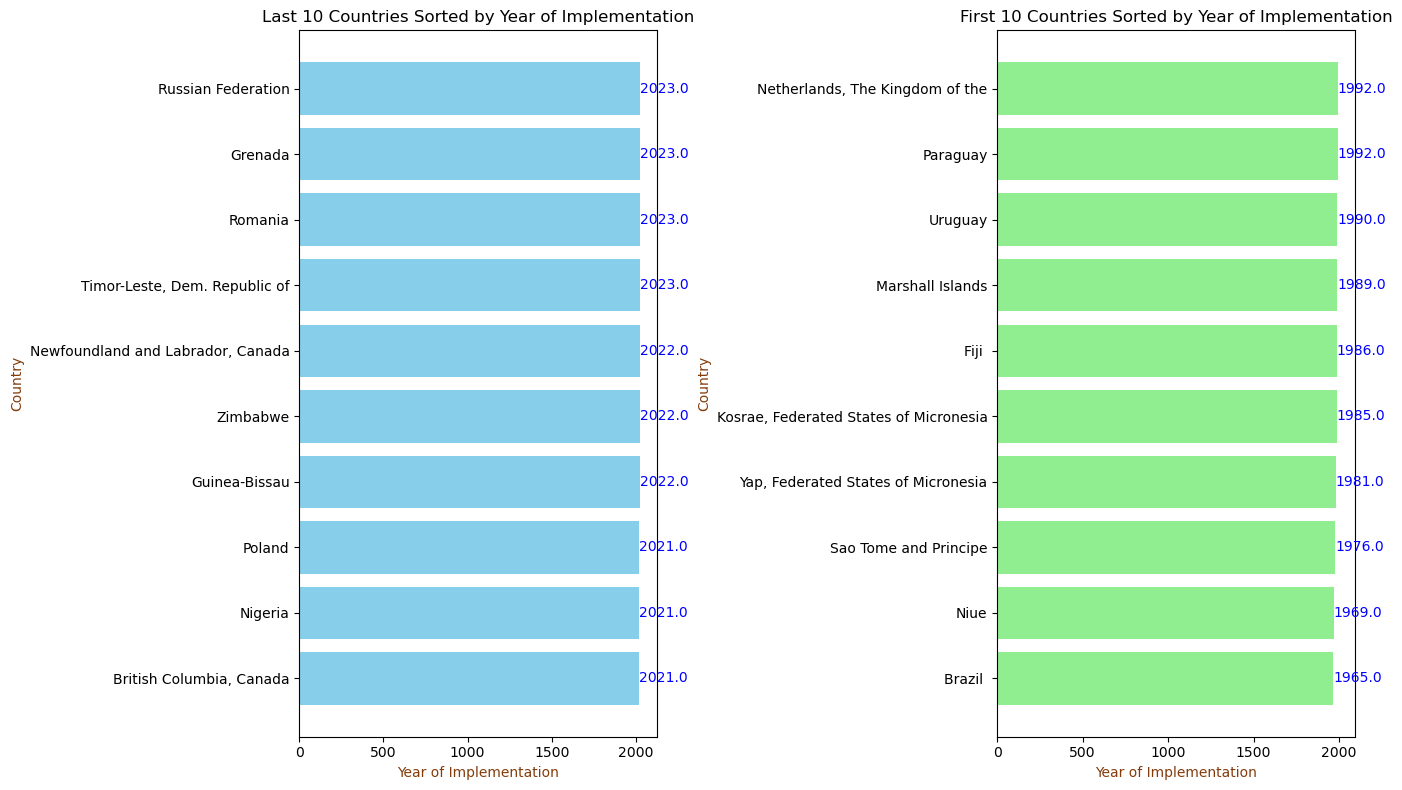

In [10]:
year_of_imp = dataset[['jurisdiction', 'year_imp']].dropna().sort_values(by='year_imp', ascending=False).reset_index(drop=True)


last_year_imp_countries = year_of_imp.head(10).reset_index(drop=True)


first_year_imp_countries = year_of_imp.tail(10).reset_index(drop=True)


print("Last 10 Countries:")
print(last_year_imp_countries)
print("\nFirst 10 Countries:")
print(first_year_imp_countries)


plt.figure(figsize=(14, 8))


plt.subplot(121)
plt.barh(last_year_imp_countries['jurisdiction'], last_year_imp_countries['year_imp'], color='skyblue')
plt.xlabel("Year of Implementation", color="#843C0C")  
plt.ylabel("Country", color="#843C0C") 
plt.title('Last 10 Countries Sorted by Year of Implementation')
plt.gca().invert_yaxis() 


for index, value in enumerate(last_year_imp_countries['year_imp']):
    plt.text(value, index, str(value), ha='left', va='center', color='blue', fontsize=10)


plt.subplot(122)
plt.barh(first_year_imp_countries['jurisdiction'], first_year_imp_countries['year_imp'], color='lightgreen')
plt.xlabel("Year of Implementation", color="#843C0C")  
plt.ylabel("Country", color="#843C0C")  
plt.title('First 10 Countries Sorted by Year of Implementation')
plt.gca().invert_yaxis()  


for index, value in enumerate(first_year_imp_countries['year_imp']):
    plt.text(value, index, str(value), ha='left', va='center', color='blue', fontsize=10)

plt.tight_layout()
plt.show()

In [11]:
group_counts_income = dataset['income_group'].value_counts()

print(group_counts_income)


HIC     45
LMIC    35
UMIC    30
LIC     18
N/C      4
Name: income_group, dtype: int64


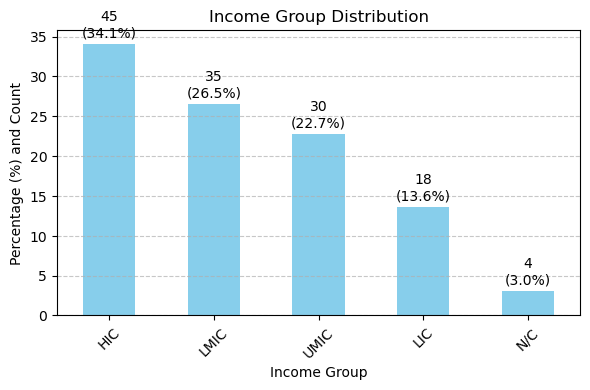

In [12]:
percentages = group_counts_income / group_counts_income.sum() * 100

plt.figure(figsize=(6, 4))
bars = percentages.plot(kind='bar', color='skyblue')


for i, bar in enumerate(bars.patches):
    count = group_counts_income.iloc[i]
    percentage = percentages.iloc[i]
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.5,
             f'{count}\n({percentage:.1f}%)',
             ha='center', va='bottom', fontsize=10, color='black')

plt.title('Income Group Distribution')
plt.xlabel('Income Group')
plt.ylabel('Percentage (%) and Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [13]:
countries_NC = dataset[dataset['income_group'] == 'N/C']['jurisdiction']

print(countries_NC)

27          Cook Islands
81                  Niue
98          Saint Helena
128    Wallis and Futuna
Name: jurisdiction, dtype: object


In [14]:
group_counts_level = dataset['level'].value_counts()

print(group_counts_level)

National          115
City/County         7
State/Province      6
National            4
Name: level, dtype: int64


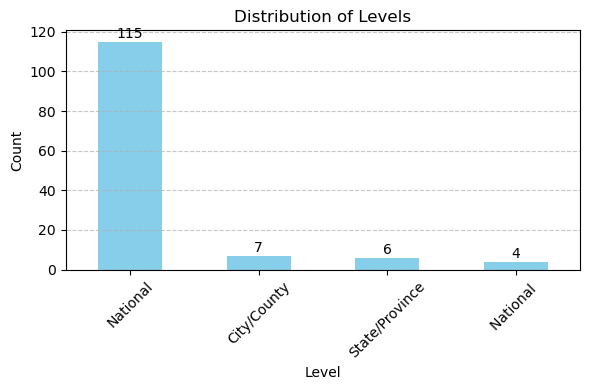

In [15]:
plt.figure(figsize=(6, 4))
bars = group_counts_level.plot(kind='bar', color='skyblue')


for i, bar in enumerate(bars.patches):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.5,
             f'{bar.get_height()}',
             ha='center', va='bottom', fontsize=10, color='black')

plt.title('Distribution of Levels')
plt.xlabel('Level')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Amount of Tax instruments in data. And then Create a count plot with seaborn, where 'instrument' is plotted on the y-axis.

In [16]:
group_counts_instrument= dataset['instrument'].value_counts()

print(group_counts_instrument)

Excise     115
Import       9
VAT/GST      6
Sales        2
Name: instrument, dtype: int64


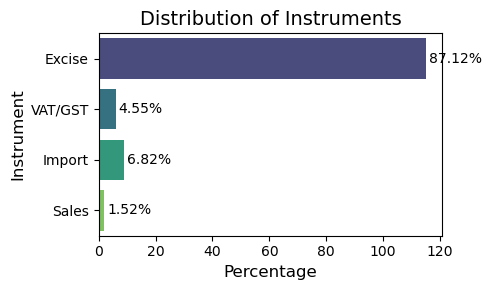

In [17]:
total = 132  

plt.figure(figsize=(5, 3))  


sns.countplot(y='instrument', data=dataset, palette='viridis')


for p in plt.gca().patches:
    width = p.get_width()
    percentage = width / total * 100
    plt.text(width + 1, p.get_y() + p.get_height() / 2, f'{percentage:.2f}%', va='center', fontsize=10)

plt.xlabel('Percentage', fontsize=12)  
plt.ylabel('Instrument', fontsize=12)  
plt.title('Distribution of Instruments', fontsize=14)  
plt.tight_layout()
plt.show()

In [18]:
group_counts_structure= dataset['structure'].value_counts()

print(group_counts_structure)

Specific      62
Ad valorem    55
Mixed         15
Name: structure, dtype: int64


Create a count plot for tax structure using seaborn,  Rotate x-axis labels for better visibility if needed. 


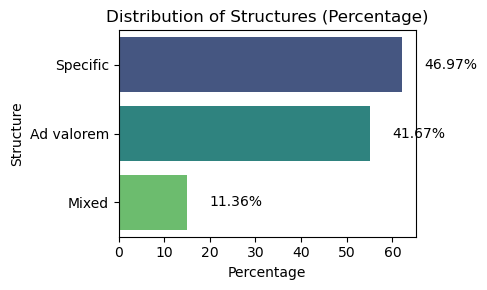

In [19]:
total = 132

plt.figure(figsize=(5, 3))  

sns.countplot(data=dataset, y='structure', palette='viridis')
for p in plt.gca().patches:
    width = p.get_width()
    plt.gca().text(width + 5, p.get_y() + p.get_height()/2, f'{width / total:.2%}', va='center', fontsize=10)

plt.title('Distribution of Structures (Percentage)')
plt.xlabel('Percentage')
plt.ylabel('Structure')
plt.tight_layout()
plt.show()


In [20]:
group_counts_basis_specific= dataset['basis_specific'].value_counts()

print(group_counts_basis_specific) 

Volume          69
Sugar            4
Volume           2
Sugar+Volume     2
Name: basis_specific, dtype: int64


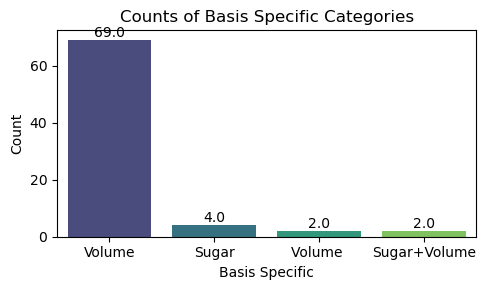

In [21]:
group_counts_basis_specific = dataset['basis_specific'].value_counts()

plt.figure(figsize=(5, 3))  # Adjust the figure size if needed

# Create a count plot with seaborn
sns.countplot(x='basis_specific', data=dataset, palette='viridis')

# Annotate each bar with its count
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}',
                       (p.get_x() + p.get_width() / 2, p.get_height()),
                       ha='center', va='bottom', fontsize=10)

plt.xlabel('Basis Specific')
plt.ylabel('Count')
plt.title('Counts of Basis Specific Categories')
plt.tight_layout()
plt.show()

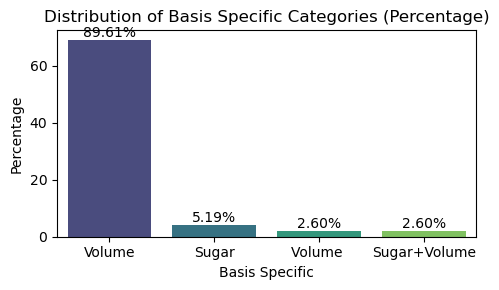

In [23]:
total = 77 

plt.figure(figsize=(5, 3))  

group_counts_basis_specific = dataset['basis_specific'].value_counts()

sns.countplot(x='basis_specific', data=dataset, palette='viridis')

for p in plt.gca().patches:
    percentage = p.get_height() / total * 100
    plt.gca().annotate(f'{percentage:.2f}%',
                       (p.get_x() + p.get_width() / 2, p.get_height()),
                       ha='center', va='bottom', fontsize=10)

plt.xlabel('Basis Specific')
plt.ylabel('Percentage')
plt.title('Distribution of Basis Specific Categories (Percentage)')
plt.tight_layout()
plt.show()


In [24]:
group_counts_exclusions= dataset['exclusions'].value_counts()

print(group_counts_exclusions)  

None                                                              12
Milk-based drinks, LCSB, 100% fruit and/or vegetable juice         5
Milk-based drinks                                                  5
Plain water                                                        3
Unsweetened water                                                  2
                                                                  ..
Water, milk -based drinks, domestic 100% juice                     1
Fruit and vegetable juices                                         1
Juices, milk-based drinks                                          1
Unsweetened water, LCSB                                            1
All SSB except energy drinks, non-carbonated unsweetened water     1
Name: exclusions, Length: 108, dtype: int64


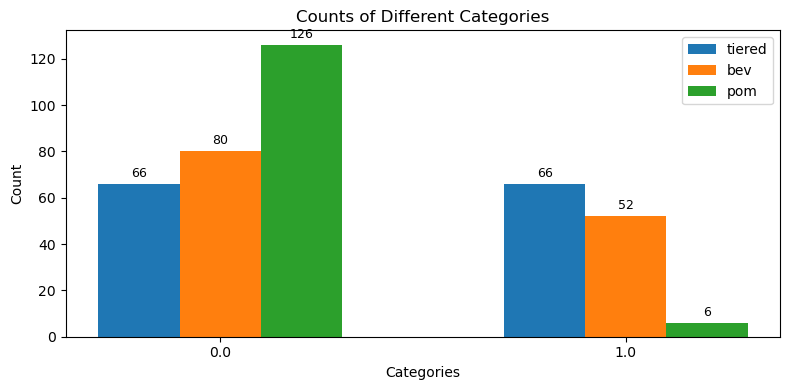

In [25]:
group_counts_tiered = dataset['tiered'].value_counts()
group_counts_bev = dataset['bev'].value_counts()
group_counts_pom = dataset['pom'].value_counts()

fig, ax = plt.subplots(figsize=(8, 4))


bar_width = 0.2

positions_tiered = range(len(group_counts_tiered))
positions_bev = [pos + bar_width for pos in positions_tiered]
positions_pom = [pos + 2 * bar_width for pos in positions_tiered]

bars_tiered = ax.bar(positions_tiered, group_counts_tiered.values, bar_width, label='tiered')
bars_bev = ax.bar(positions_bev, group_counts_bev.values, bar_width, label='bev')
bars_pom = ax.bar(positions_pom, group_counts_pom.values, bar_width, label='pom')

for bars in [bars_tiered, bars_bev, bars_pom]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{}'.format(height),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=9)

ax.set_xlabel('Categories')
ax.set_ylabel('Count')
ax.set_title('Counts of Different Categories')
ax.set_xticks(positions_bev)
ax.set_xticklabels(group_counts_tiered.index)
ax.legend()

plt.tight_layout()
plt.show()

In [26]:
countries_with_pom_1 = dataset[dataset['pom'] == 1.0]['jurisdiction']

print(countries_with_pom_1)

5                        Bangladesh
21                         Cameroon
41                French Polynesia 
58                          Liberia
59                       Madagascar
114    Tanzania, United Republic of
Name: jurisdiction, dtype: object


In [27]:
countries_with_swe_1 = dataset[dataset['swe'] == 1.0]['jurisdiction']

print(countries_with_swe_1)

91    Philippines 
Name: jurisdiction, dtype: object
